In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('classic')



 In this problem, we write a program to find the coefficients for a linear regression model
for the dataset provided (data2.txt). Assume a linear model: $y = w_0 + w_1*x$. You need to


* 1) Plot the data (i.e., x-axis for 1
st column, y-axis for 2
nd column),
and use Python to implement the following methods to find the coefficients:
* 2) Normal equation, and
* 3) Gradient Descent using batch AND stochastic modes respectively:
    * a) Determine an appropriate termination condition (e.g., when cost function is less than a threshold, and/or after a given number of iterations).
    * b) Print the cost function vs. iterations for each mode; compare and discuss batch and stochastic modes in terms of the accuracy and the speed of convergence.
    * c) Choose a best learning rate. For example, you can plot cost function vs. learning rate to determine the best learning rate.


Please implement the algorithms by yoursef and do NOT use the fit() function of the library. 

In [2]:
path = '/data2.txt'

df = pd.read_table(path, ',', names=['x', 'y'])
df.head()

,x,y
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


## 1) Plot the data 

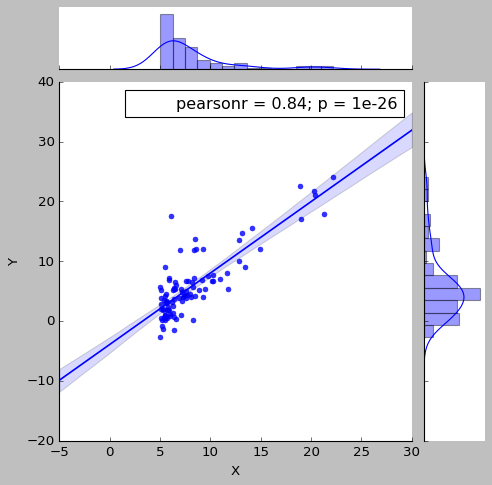

In [3]:
sns.jointplot(np.array(df['x']), np.array(df['y']), kind='reg')
plt.xlabel('X')
plt.ylabel('Y')

## 2) Normal Equation

use Normal Equation to calculate the coefficients of linear function
$$
\theta = (X^T X)^{-1}X^Ty
$$

In [4]:
# Add intercept term 
df['x_0'] = 1

# Get the matrix of x and y
X = np.matrix(df[['x', 'x_0']])
y = np.matrix(df['y']).T

In [5]:
'''
NormalEq: use Normal Equation to calculate the coefficients
input:
    X: a matrix of features and intercept term x_0
    y: a matrix of target y
output:
    result: a matrix of result
'''    
def NormalEq(X,y):
    a = np.dot(X.T, X)
    if np.linalg.det(a) == 0:
        print('Matrix is not invertible!')
    else:
        result = np.dot(a.I.dot(X.T), y)
    return result

In [6]:
w_1, w_0 = NormalEq(X,y)

print('Weight:', float(w_1))
print('Intercept:',float(w_0))

Weight: 1.1930336441895948
Intercept: -3.8957808783118626


## 3) Gradient Descent (batch AND stochastic)





linear regression model:
* linear hypothesis: $\hat{y} = w_0 + w_1\cdot x$
* cost function: $J(w_0, w_1) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)}-y^{(i)})$

Gradient Descent algorithm:
$$
w_j = w_j - \alpha \frac{\partial}{\partial w_j}J(w_0, w_1)
$$

and also can write as:
$$
\begin{align}
w_0 &= w_0 - \alpha \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})\\
w_1 &= w_1 - \alpha \frac{1}{m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})\cdot x^{(i)}
\end{align}
$$

## 1. Reshape Data

In [10]:
## Preprogressing
X_2 = np.reshape(df['x'], (-1,1))
y_2 = np.reshape(df['y'], (-1,1))

print('the shape of X_2:', X_2.shape)
print('the shape of y_2:', y_2.shape)

the shape of X_2: (97, 1)
the shape of y_2: (97, 1)


## 2. Cost Function & GD algorthim & Best $\alpha$
define three functions:
* `CostFun`: use to calculate the cost function (MSE)
* `GradientDescent`: use gradient descent algorthim to calculate coefficient
* `OptimalAlpha`: use to get the optimal value of learning rate

In [4]:
'''
CostFun: Calculate the cost function (MSE)
input:
    Y_1: true value
    Y_2: predict value
output:
    cost: the value of cost
'''
def CostFun(Y_1, Y_2):
    m = len(Y_1)
    cost = (1/m)*np.sum((Y_1.T - Y_2) ** 2)
    return cost



'''
GradientDescent: use gradient descent algorthim to calculate coefficient
input:
    w_0: defalut intercept
    w_1: defalut weight
    X: features
    y: target variable
output:
    dw_0: intermediate value in the process of calculating w_0
    dw_1: intermediate value in the process of calculating w_1
    cost: the value of cost
'''
def GradientDescent(w_0,w_1,X,y):
    # Get the length of X
    m = X.shape[0]
    # define the result of y and cost function
    y_hat = np.dot(w_1, X.T) + w_0
    cost = CostFun(y, y_hat)
    # calculate the derivatives of cost function
    dw_0 = (-2/m)*np.sum(((y.T - y_hat)))
    dw_1 = (-2/m)*np.sum((np.dot(X.T,(y.T - y_hat).T)))

    return dw_0, dw_1, cost



'''
OptimalAlpha: get the optimal value of learning rate
input:
    method: the method of gradient descent; including "BatchGD" and "StochasticGD"
    s_alpha: the start value of learning rate
    e_alpha: the end value of learning rate
    num_alpha: the number of alpha to use
    X, y: features and target
    n: the times of iterations
output:
    alpha_cost: the total cost of GD
'''
def OptimalAlpha(method, s_alpha, e_alpha, num_alpha, X, y, n):
    # empty list to store cost
    alpha_cost = []
    
    alpha_list = np.linspace(s_alpha, e_alpha, num_alpha)

    for i in alpha_list:
        w_0, w_1, costs = method(X, y, i, n)
        y_pred = np.dot(w_1, X_2.T) + w_0
        train_cost = CostFun(y_2, y_pred)
        alpha_cost.append(train_cost)
    return alpha_cost

## 3. Batch Gradient Descent



### 3.1 Define a `BatchGD` function to implement BGD model

In [12]:
'''
BatchGD: use Batch Gradient Descent to update coefficients
input:
    X, y: features and target
    alpha: learning rate
    n: the number of iterations
return:
    w_0: the updated value of intercept
    w_1: the updated value of weight
    cost: the value of cost
'''
def BatchGD(X, y, alpha, n):
    # initialize weight
    w_0 = 0
    w_1 = np.zeros((1, X.shape[1]))
    # a empty list to store cost functions
    costs = []
    # batch gradient descent
    for i in range(n):
        dw_0, dw_1, cost = GradientDescent(w_0, w_1, X, y)
        # Update coefficients
        w_1 = w_1 - (alpha*dw_1)
        w_0 = w_0 - (alpha*dw_0)
        # update cost functions
        costs.append(cost)

    return w_0, w_1, costs

### 3.2 Get the coefficients of linear model and  calculate traning error


model parameters
* learning rate: 0.01
* iteration： 1000

In [13]:
w_0, w_1, costs = BatchGD(X_2, y_2, 0.01, 1000)
y_pred = np.dot(w_1, X_2.T) + w_0
train_cost = CostFun(y_2, y_pred)

print('Weight:', float(w_1))
print('Intercept:',w_0)
print('Training error:',train_cost)

Weight: 1.1822480052540147
Intercept: -3.7884192615511822
Training error: 8.956041486642253


### 3.3 Plot cost vs iteration


In [ ]:
print(costs)

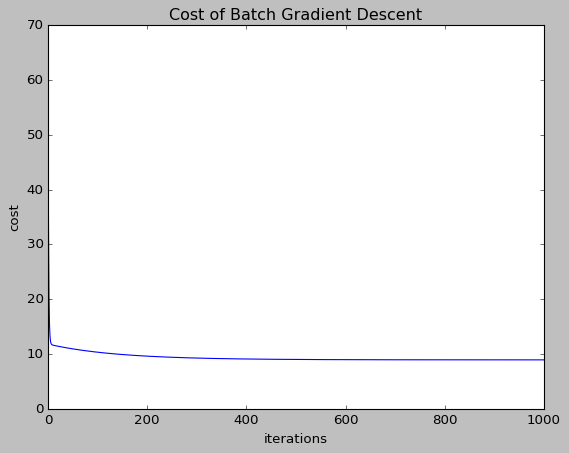

In [14]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost of Batch Gradient Descent')
plt.show()

It can be seen from the figure that the cost drops sharply with iteration at the beginning, and it converges around 200 iterations. 

### 3.4 Get the optimal learning rate

Choose 100 numbers from 0.001 to 0.01, build a list of learning rates, and calculate the cost separately

In [15]:
# optimal leraning rate Batch GD
alpha_cost = OptimalAlpha(BatchGD, 0.001, 0.01, 100, X_2, y_2, 2000)

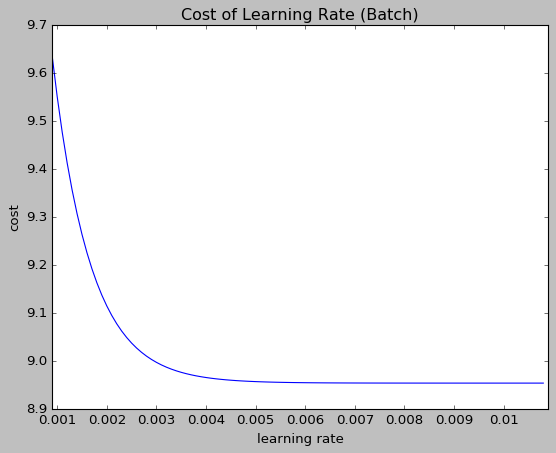

In [16]:
plt.plot(alpha_cost)
plt.xticks(np.arange(1, 101, 10), [round(x, 3) for x in np.arange(0.001, 0.011, 0.001)])
plt.ylabel('cost')
plt.xlabel('learning rate')
plt.title('Cost of Learning Rate (Batch)')
plt.show()

It can be seen from the figure that in the batch gradient descent, the cost decreases as the learning rate increases, and it reaches convergence at about 0.006 learning rate.

Hence choose 0.01 as the optimal learning rate of this experiment.

##  4. Stochastic Gradient Descent

### 4.1 Shuffle the data to get a random order

In [30]:
# shuffle data
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,x,y
0,7.5386,3.88450
1,5.6407,0.71618
2,8.2951,5.74420
3,6.3328,1.42330
4,10.2360,7.77540


In [31]:
## Preprogressing
X_3 = np.reshape(df['x'], (-1,1))
y_3 = np.reshape(df['y'], (-1,1))

### 4.2 Define a `StochasticGD` function to implement SGD model

In [4]:
'''
StochasticGD: use Stochastic Gradient Descent to update coefficients
input:
    X, y: features and target
    alpha: learning rate
    n: the number of iterations
return:
    w_0: the updated value of intercept
    w_1: the updated value of weight
    cost: the value of cost
'''
def StochasticGD(X, y, alpha, n):
    # initialize weight
    w_0 = 0
    w_1 = np.zeros((1, X.shape[1]))
    
    m = X.shape[0]
    the_costs = []
    #
    for i in range(n):
        for i in range(m):
            costs = []
            index = i
            X_s, y_s = X[index:index+1], y[index:index+1]
            
            dw_0, dw_1, cost = GradientDescent(w_0,w_1,X_s,y_s)

            #Weight Update
            w_1 = w_1 - (alpha*dw_1)
            w_0 = w_0 - (alpha*dw_0)
            
            costs.append(cost)
        
        the_costs.append(np.average(costs))
            
    return w_0, w_1, the_costs 

### 4.3 Get the coefficients of linear model and  calculate traning error


model parameters
* learning rate: 0.001
* iteration： 100

In [33]:
w_0, w_1, costs = StochasticGD(X_3, y_3, 0.001, 100)
y_pred = np.dot(w_1, X_3.T) + w_0
train_cost = CostFun(y_3, y_pred)

print('Weight:', float(w_1))
print('Intercept:',w_0)
print('Training error:',train_cost)

Weight: 1.1318033959161184
Intercept: -3.8875845986019533
Training error: 9.25101481967387


In [5]:
X_3 = np.reshape(df['x'], (-1,1))
y_3 = np.reshape(df['y'], (-1,1))

### 4.4 Plot cost vs iteration

In [ ]:
print(costs)

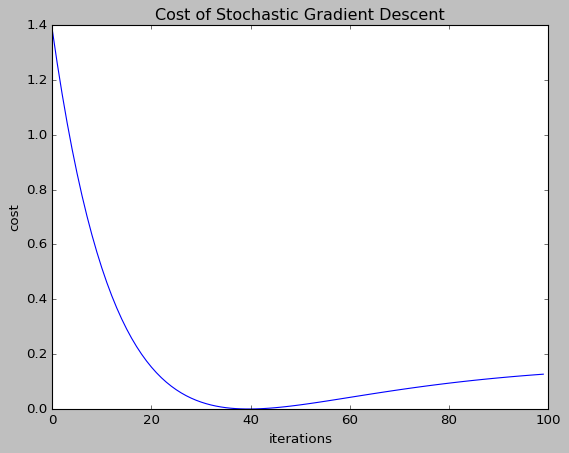

In [34]:
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title('Cost of Stochastic Gradient Descent')
plt.show()

It can be seen from the figure that in SGD, the overall cost decreases with the increase of iteration, but there are subsequent fluctuations.

### 4.4 Get the optimal learning rate

Choose 100 numbers from 0.001 to 0.01, build a list of learning rates, and calculate the cost separately

In [39]:
# optimal leraning rate of Stochastic GD
alpha_cost = OptimalAlpha(StochasticGD, 0.001, 0.01, 100, X_2, y_2, 100)

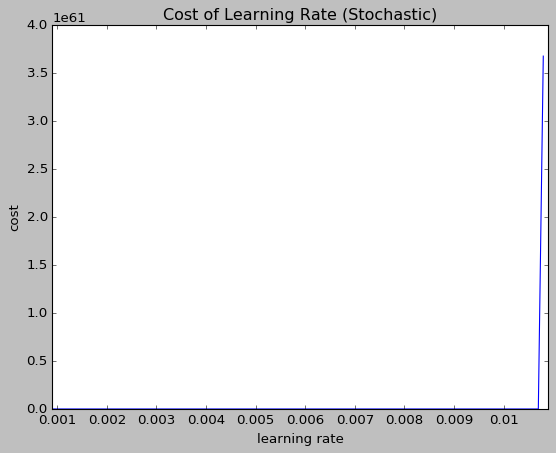

In [40]:
plt.plot(alpha_cost)
plt.xticks(np.arange(1, 101, 10), [round(x, 3) for x in np.arange(0.001, 0.011, 0.001)])
plt.ylabel('cost')
plt.xlabel('learning rate')
plt.title('Cost of Learning Rate (Stochastic)')
plt.show()

As can be seen from the figure, in SGD, a very low cost is obtained with a small learning rate, but there are fluctuations in the subsequent cost. 

Hence choose 0.001 as the optimal learning rate of SGD

## 5. Conclusion: compare BGD & SGD

Through the calculation of the above two models, it can be known that ：

* BGD Training error: 8.956041486642253
* SGD Training error: 9.25101481967387

It can be seen that in this data, BGD has a better performance.

When performing gradient descent, BGD can obtain the global optimal solution, which can ensure that the weight is updated every time. But when the number of samples is large, the training process will be very slow. Since this data has only 97 samples, there is no obvious impact.

On the contrary, for SGD, one sample is used to update the parameters. If the sample size is large, only a part of the sample may be used, and the parameters have been iterated to the optimal solution. But its accuracy is reduced, and the global optimum cannot be obtained.